# Project: Investigate a FBI Gun Data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

### 1.1. Dataset Description 
In investigation  will be used 2 data sets
- The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The NICS data contains the number of firearm checks by month, state, and type.
- The U.S. census data contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.

Tables content information about  amount of population or checks per year, state.

### 1.2. Question(s) for Analysis
Question 1: what is over all staistics about gun sales capita at different states in 2010 and 2016?
- what average level of guns sales capita
- which states have highest and lowes levels 
- which distribution this spread has

Question 2: is any correlation between population parameters and gun sales?
- any connection between people dencity in states and level of sales gun
- any conection between amount of people and amount of gun sales
            
Question 3: what is genral trend for gun sales per year?
- compare trend for gun sales and populatation
- is trand similar for different states

### 1.3. Section to import and update all needed packages used in report preparation

In [1]:
# import pandas
import pandas as pd               # add pandas package
import matplotlib.pyplot as plt   # add parameters to plot
import seaborn as sns             # add visualization package
import numpy as np                # add numpy package
# inline plotting in Juputer notebook
% matplotlib inline               

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## 2. Data Wrangling

### 2.1. Load and investigate data from 'census_data.csv'. 

In [3]:
# load census data 
cdf = pd.read_csv('census_data.csv')
cdf.head(3)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%


In [4]:
# show data info for 'census_data.csv'
print('Dimensions')
print(cdf.shape)
print('\nColumns value')
print(cdf.columns)
print ('\nRow meaning')
print(cdf.Fact.unique())

Dimensions
(85, 52)

Columns value
Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

Row meaning
['Population estimates, July 1, 2016,  (V2016)'
 'Population estimates base, April 1, 2010,  (V2016)'
 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)'
 'Population, Census, Apr

**Conclusion:**
In 'census_data.csv' there are lots of details about census statistics for 2010 and 2016 years per each of 50 state.
Most valuable are (for first step of analysys):
- total population for each year
- % of people of different ages
- people dencity per square mile (only for 2010)
Data organization: 
- columns are states
- rows are criterias

### 2.2. Load and investigate data from 'gun_data.csv'

In [5]:
#load data for gun checks
gdf = pd.read_csv('gun_data.csv', sep=';')
gdf.head(3)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394


In [6]:
# show data info for 'gun_data.csv'
print('Dimensions')
print(gdf.shape)
print('\nColumns value')
print(gdf.columns)

Dimensions
(12485, 27)

Columns value
Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')


In [7]:
#check data types and values for initial DF
gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

**Conclusion:** 

*Note: Original file 'gun_data.xlsx' was tranferred to 'gun_data.csv' by using MS Excel*

In 'gun_data.csv' there are detailed statistics for different gun checks per month for each state.
Most valuable are (based on comments and recommendations):
- amount of checks for handgun 
- amount of checks for long_gun
- amount of checks for multiple guns
Data organization: 
- columns are different check types
- rows are total amount of checks per month per state

*note: not all data for checks are available, there are NULL vlaue*

### 2.3. Reorganize and clean data from 'census_data.csv'. 
Main actions to clean data: 
- extract population data for 2010 and 2016 in different states, 
- extract % of people under 18 for calculation values for adulte population (who able to buy guns)
- reorganize data frame: shift from rows data to columns data for each state,
- check communality of data formats and convert data types to numeic, 
- calculate adult population (older than 18 years) to specify amount of people able to buy guns.

In [8]:
#select total population at different states in 2016 as separate lists
row_to_select = ['Population estimates, July 1, 2016,  (V2016)']
cdf_ppltn_16 = cdf.query('Fact == @row_to_select').loc[:,'Alabama':'Wyoming']
cdf_ppltn_16_val = cdf_ppltn_16.sum()
print('2016 population: \n', cdf_ppltn_16_val.head(3))
print(" ")

#select total population at different states in 2010 as separate lists
row_to_select = ['Population estimates base, April 1, 2010,  (V2016)']
cdf_ppltn_10 = cdf.query('Fact == @row_to_select').loc[:,'Alabama':'Wyoming']
cdf_ppltn_10_val= cdf_ppltn_10.sum()
print('2010 population: \n', cdf_ppltn_10_val.head(3))

2016 population: 
 Alabama    4,863,300
Alaska       741,894
Arizona    6,931,071
dtype: object
 
2010 population: 
 Alabama    4,780,131
Alaska       710,249
Arizona    6,392,301
dtype: object


In [9]:
#select % of young people (under 18 years) at different states in 2016 as separate lists
row_to_select = ['Persons under 18 years, percent, July 1, 2016,  (V2016)']
cdf_yng_16 = cdf.query('Fact == @row_to_select').loc[:,'Alabama':'Wyoming']
cdf_yng_16_val = cdf_yng_16.sum()
print('2016 youth: \n', cdf_yng_16_val.head(3))
print(" ")

#select % of young people (under 18 years) at different states in 2016 as separate lists
row_to_select = ['Persons under 18 years, percent, April 1, 2010']
cdf_yng_10 = cdf.query('Fact == @row_to_select').loc[:,'Alabama':'Wyoming']
cdf_yng_10_val = cdf_yng_10.sum()
print('2010 youth: \n', cdf_yng_10_val.head(3))

2016 youth: 
 Alabama    22.60%
Alaska     25.20%
Arizona    23.50%
dtype: object
 
2010 youth: 
 Alabama    23.70%
Alaska     26.40%
Arizona    25.50%
dtype: object


In [10]:
#select population per sq mile at different states in 2010 as separate lists
row_to_select = ['Population per square mile, 2010']
cdf_ppsm_10_val = cdf.query('Fact == @row_to_select').loc[:,'Alabama':'Wyoming']
cdf_ppsm_10_val = cdf_ppsm_10_val.sum()
print('2010 population per square mile: \n', cdf_ppsm_10_val.head(3))

2010 population per square mile: 
 Alabama    94.4
Alaska      1.2
Arizona    56.3
dtype: object


In [11]:
# create new data frame with states and population in 2010 and 2016
states = cdf_yng_16.columns
cols = ['state', 'tot_ppltn_10', 'tot_ppltn_16', 'yng_prcnt_10', 'yng_prcnt_16', 'tot_ppsm_10']
indx = list(range(states.shape[0]))
cdf_ppltn = pd.DataFrame( 
    {cols[0]:states, 
     cols[1]:cdf_ppltn_16_val, 
     cols[2]:cdf_ppltn_10_val,
     cols[3]:cdf_yng_10_val,
     cols[4]:cdf_yng_16_val,
     cols[5]:cdf_ppsm_10_val } )

In [12]:
#check null values and data content
print('NULL values: \n', cdf_ppltn.isnull().sum())
cdf_ppltn.tail(15)

NULL values: 
 state           0
tot_ppltn_10    0
tot_ppltn_16    0
yng_prcnt_10    0
yng_prcnt_16    0
tot_ppsm_10     0
dtype: int64


,state,tot_ppltn_10,tot_ppltn_16,yng_prcnt_10,yng_prcnt_16,tot_ppsm_10
Oklahoma,Oklahoma,3923561,3751615,0.248,0.245,54.7
Oregon,Oregon,4093465,3831072,0.226,0.212,39.9
Pennsylvania,Pennsylvania,12784227,12702857,0.22,0.209,283.9
Rhode Island,Rhode Island,1056426,1052940,0.213,0.197,1018.1
South Carolina,South Carolina,4961119,4625410,0.234,0.221,153.9
South Dakota,South Dakota,865454,814195,0.249,0.246,10.7
Tennessee,Tennessee,6651194,6346298,0.236,0.226,153.9
Texas,Texas,"27,862,596","25,146,100",27.30%,26.20%,96.3
Utah,Utah,"3,051,217","2,763,888",31.50%,30.20%,33.6
Vermont,Vermont,"624,594","625,741",20.70%,19.00%,67.9


**Short conclusion for  data content:**
- no NULL values in data
- for population data used ',' to separate thousands
- for percent data used 2 types: with % value and decimal value

Deviation to be fixed during "cleaning process" and datatypes converted to numeric bellow

In [13]:
#check data types for initial DF
cdf_ppltn.dtypes

state           object
tot_ppltn_10    object
tot_ppltn_16    object
yng_prcnt_10    object
yng_prcnt_16    object
tot_ppsm_10     object
dtype: object

In cycle replace string simbols and conver to different formats

In [14]:
# change str to int for population, 
# str to float for under 18 population percent
# str to float for under 18 population dencity

symb = [',', ',', '%', '%', ',']
tps = ['int', 'int', 'float', 'float', 'float']
idx = 0
for col in cdf_ppltn.columns[1:]:
    cdf_ppltn[col] = cdf_ppltn[col].str.replace(symb[idx], '', regex=True)
    cdf_ppltn[col] = cdf_ppltn[col].astype(tps[idx])
    idx = idx + 1

Percent values should be converted to decimal format

In [15]:
# select indexes of rows with percent format (> 1)
prcnt_idx = cdf_ppltn.query('yng_prcnt_10 > 1')['yng_prcnt_10'].index
# calculate values in decimal format
prcnt_val_cor = cdf_ppltn.loc[prcnt_idx, 'yng_prcnt_10':'yng_prcnt_16']/100
# update values from % to deciaml
cdf_ppltn.loc[prcnt_idx, 'yng_prcnt_10':'yng_prcnt_16'] = prcnt_val_cor

Add extra columns contained calculated adulte population data

In [16]:
#calculate adulte population as ( 1 - perent of young ) from totla poulation
cdf_ppltn['adlt_ppltn_10'] = round(cdf_ppltn.tot_ppltn_10*(1-cdf_ppltn.yng_prcnt_10))
cdf_ppltn['adlt_ppltn_16'] = round(cdf_ppltn.tot_ppltn_16*(1-cdf_ppltn.yng_prcnt_16))
cdf_ppltn['adlt_ppsm_10']  = round(cdf_ppltn.tot_ppsm_10 *(1-cdf_ppltn.yng_prcnt_10))

#conver types from float to int
cdf_ppltn.adlt_ppltn_10 = cdf_ppltn.adlt_ppltn_10.astype(int)
cdf_ppltn.adlt_ppltn_16 = cdf_ppltn.adlt_ppltn_16.astype(int)
cdf_ppltn.adlt_ppsm_10  = cdf_ppltn.adlt_ppsm_10.astype(float)

cdf_ppltn.head(3)

,state,tot_ppltn_10,tot_ppltn_16,yng_prcnt_10,yng_prcnt_16,tot_ppsm_10,adlt_ppltn_10,adlt_ppltn_16,adlt_ppsm_10
Alabama,Alabama,4863300,4780131,0.237,0.226,94.4,3710698,3699821,72.0
Alaska,Alaska,741894,710249,0.264,0.252,1.2,546034,531266,1.0
Arizona,Arizona,6931071,6392301,0.255,0.235,56.3,5163648,4890110,42.0


In [17]:
#check shape and data types for final table
print(cdf_ppltn.shape)
cdf_ppltn.dtypes

(50, 9)


state             object
tot_ppltn_10       int64
tot_ppltn_16       int64
yng_prcnt_10     float64
yng_prcnt_16     float64
tot_ppsm_10      float64
adlt_ppltn_10      int64
adlt_ppltn_16      int64
adlt_ppsm_10     float64
dtype: object

In [18]:
# save clean data in file 'census_data_clean.csv'
cdf_ppltn.to_csv('census_data_clean.csv', index=False)

### 2.4. Reorganize and clean data from 'gun_data.csv'
Actions to clean data: 
- to select colums which repesent connection between checks and sales:
  'handgun', 'long_gun', 'multiple'
- treat month as period and duplicate it to year and month
- convert types to numeric

In [19]:
# drop other colums and keep only 'handgun' 'long_gun' 'multiple' per state and month
gdf_buy = gdf.iloc[:,[0,1,4,5,7]]
gdf_buy.head(3)

,month,state,handgun,long_gun,multiple
0,2017-09,Alabama,5734.0,6320.0,317
1,2017-09,Alaska,2320.0,2930.0,160
2,2017-09,Arizona,11063.0,7946.0,631


In [20]:
# rename 'month' to 'period' and add split columns for 'year' and 'month'
gdf_buy = gdf_buy.rename(columns={'month':'period'})
gdf_buy['year']=gdf_buy.period.apply(lambda x: x.split("-")[0])
gdf_buy['month']=gdf_buy.period.apply(lambda x: x.split("-")[1])
gdf_buy.head(3)

,period,state,handgun,long_gun,multiple,year,month
0,2017-09,Alabama,5734.0,6320.0,317,2017,09
1,2017-09,Alaska,2320.0,2930.0,160,2017,09
2,2017-09,Arizona,11063.0,7946.0,631,2017,09


In [21]:
# check Null values in DF
print('Check null values')
print(gdf_buy.isnull().sum())

Check null values
period       0
state        0
handgun     20
long_gun    19
multiple     0
year         0
month        0
dtype: int64


**Short conclusion for  data content:**
- 'handgun' and 'long_gun' values needs to change from float to int type
- there are NULL values, to be filled by mean values for specific 'year' and specific 'state'

In [22]:
# take indexes witn NULL values to define years
idx = gdf_buy.handgun.isnull()
gdf_buy_null = gdf_buy.loc[idx,['state','year']]

In [23]:
# select state and year values with NULL
state_null = gdf_buy_null.state.unique()
print(state_null)
year_nul = gdf_buy_null.year.unique()
print(year_nul)

['Virgin Islands' 'Mariana Islands']
['2005' '2004' '2003' '1999' '1998']


In cycle select indexes for state and year with NULL values, calculate mean values at specific year and state. Replace NULL's by mean values and update main DataFrame

In [24]:
# calculate mean value for year and state
for st in state_null:
    for yr in year_nul:
        #filter by state and year to calculate mean
        gdf_st_yr = gdf_buy.query('state == @st and year == @yr')
        mn_val = round(gdf_st_yr.mean())
        
        #replace NaN by mean value for each state each year
        gdf_st_yr.handgun.fillna( mn_val[0], inplace = True) 
        gdf_st_yr.long_gun.fillna(mn_val[1], inplace = True) 
        gdf_st_yr.multiple.fillna(mn_val[2], inplace = True) 
        
        #update main data frame by indexes
        gdf_buy.loc[gdf_st_yr.index,:] = gdf_st_yr      

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [25]:
# check NULL values in DF
print('Check null values')
print(gdf_buy.isnull().sum())

Check null values
period      0
state       0
handgun     0
long_gun    0
multiple    0
year        0
month       0
dtype: int64


**Note: to get valid values for gun sales analysys will use Jurgen Brauer method** 
- each long gun and handgun check counted as 1.1 sales
- each multiple-gun check was counted as 2 sales

In [26]:
# define and apply multipliers for each check
mpl = [1.1, 1.1, 2]

num = 0
#update selected columns
for col in gdf_buy.columns[2:5]:
    gdf_buy[col] = round(gdf_buy[col] * mpl[num])
    num = num + 1

gdf_buy.head(3)    

,period,state,handgun,long_gun,multiple,year,month
0,2017-09,Alabama,6307.0,6952.0,634,2017,09
1,2017-09,Alaska,2552.0,3223.0,320,2017,09
2,2017-09,Arizona,12169.0,8741.0,1262,2017,09


Convert types from str to numeric

In [27]:
# convert types from float to int
gdf_buy.handgun = gdf_buy.handgun.astype(int)
gdf_buy.long_gun = gdf_buy.long_gun.astype(int)
gdf_buy.year = gdf_buy.year.astype(int)
gdf_buy.month = gdf_buy.month.astype(int)

In [28]:
#check shape and data types for final table
print(gdf_buy.shape)
gdf_buy.dtypes

(12485, 7)


period      object
state       object
handgun      int64
long_gun     int64
multiple     int64
year         int64
month        int64
dtype: object

Checking communality in years and State names

In [29]:
#check values for years and states (to compare with census data)
print('Years')
print(gdf_buy.year.unique())

print ('States from gun data')
state_gdf = gdf_buy.state.unique()
print(state_gdf.shape)
print(state_gdf)
print ('States from census data')
state_cdf_ppltn = cdf_ppltn.state.unique()
print(state_cdf_ppltn.shape)
print(state_cdf_ppltn)


Years
[2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004
 2003 2002 2001 2000 1999 1998]
States from gun data
(55,)
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Mariana Islands' 'Maryland' 'Massachusetts'
 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska'
 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']
States from census data
(50,)
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentu

**Short conclusion for data content:**
    - for 'year' both statistics 2010 and 2016 are available 
    - for 'state' in census data 50 states are available
    - for 'state' in gun data 55 states are available
    not common states should be dropped from gun data

In [30]:
# drop lines in gun DF with states not included in census DF
state_to_drop = ['District of Columbia', 'Mariana Islands', 'Virgin Islands', 'Guam', 'Puerto Rico']
idx = gdf_buy.query('state in @state_to_drop').index
gdf_buy.drop(index=idx, inplace=True)
state_gdf = gdf_buy.state.unique()

**Obs!!!** 
States 'Virgin Islands' and 'Mariana Islands' which were cleaned from NULL values finily were droped
Actions for NULL values cleaning would be skipped above.

In [31]:
# check commonality in staes names
(state_gdf == state_cdf_ppltn).sum()

50

In [32]:
# save clean data in file 'gun_data_clean.csv'
gdf_buy.to_csv('gun_data_clean.csv', index=False)

### 2.5. Conclusion 
After initial data analysys and data cleaning 2 data frames were prepared and saved as "clean" files.
Analysys will be done based on statistics data: population and gun sales for each state

*Note: added 2 extra section to load already clean data sets, to start exploaration skipping cleaning*

In [33]:
#check if dataframe 'cdf_ppltn' was loaded before
if 'cdf_ppltn' not in globals():
    # if start without cleaning - load census data clean 
    cdf_ppltn = pd.read_csv('census_data_clean.csv')
    print(cdf_ppltn.head(3))
else:
    print('Data frame "cdf_ppltn" exist.')

Data frame "cdf_ppltn" exist.


In [34]:
#check if dataframe 'gdf_buy' was loaded before
if 'gdf_buy' not in globals():
    # if start without cleaning - load census data clean 
    gdf_buy = pd.read_csv('gun_data_clean.csv')
    print(gdf_buy.head(3))
else:
    print('Data frame "gdf_buy" exist.') 

Data frame "gdf_buy" exist.


<a id='eda'></a>
## 3. Exploratory Data Analysis

### Question 1: what is over all staistics about gun sales capita at different states in 2010 and 2016?

**Select neded data for specific year year. To not to repeat several times - define steps as function 'select_year_data'**

To perform analysys function creates join tables with census and gun data fro 2010
- include gun sales statistics
- include population statistics
- include population per sq.ml. statistics
- calculate amount of guns per 1000 men
- calculate % of state population from total country population
- calculate % of state gun sales from total country gun sales

In [35]:
def select_year_data (gdf_loc, cdf_loc, year, ppsm = False, prnt_res = False):
    # select yearly statistics for gun sales per state in 'year'
    gdf_buy_y = gdf_loc.query('year == @year')
    gdf_buy_y['total'] = gdf_buy_y.handgun + gdf_buy_y.long_gun + gdf_buy_y.multiple
    gdf_buy_tot_st = gdf_buy_y.groupby('state').total.sum()
    if prnt_res:
        print('Gun data per state \n', gdf_buy_tot_st.head(3))
        print(" ")

    # select total adulte population per state and % from total in 2010
    #if ppsm = True then incluse info for population per sq.m.
    if ppsm:
        cdf_ppltn_tot_st = cdf_loc.groupby('state')['adlt_ppltn_' + year[-2:],'adlt_ppsm_' + year[-2:]].sum()
        colmn = ['total_guns', 'total_pop_ad', 'total_ppsm']
    else:
        cdf_ppltn_tot_st = cdf_loc.groupby('state')['adlt_ppltn_' + year[-2:]].sum()
        
        colmn = ['total_guns', 'total_pop_ad']
    
    if prnt_res:
        print('Population data per state \n', cdf_ppltn_tot_st.head(3))
    
    # create commom data frame with gun sales yearly statistics and adulte population for 2010
    df_cmn = pd.merge(gdf_buy_tot_st, cdf_ppltn_tot_st, on='state')
    df_cmn.columns = colmn

    # calculate % value from total
    gdf_buy_tot    = gdf_buy_tot_st.sum()
    adlt_ppltn_tot = cdf_loc.adlt_ppltn_10.sum()
    df_cmn['gun_per_thousand'] = df_cmn.total_guns  /df_cmn.total_pop_ad*1000
    df_cmn['prcnt_tot_gun']    = df_cmn.total_guns  /gdf_buy_tot
    df_cmn['prcnt_tot_pop_ad'] = df_cmn.total_pop_ad/adlt_ppltn_tot
    
    if prnt_res:
        print('\nFinal table\n', df_cmn.head(3))
    
    return df_cmn

Select neded data for 2016 year and perform analysys with census and gun data for 2016 via function

In [36]:
# select yearly statistics for gun sales per state in 2010
df_cmn_10 = select_year_data (gdf_buy, cdf_ppltn, '2010', ppsm=True)
df_cmn_10.head(3)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,total_guns,total_pop_ad,total_ppsm,gun_per_thousand,prcnt_tot_gun,prcnt_tot_pop_ad
state,,,,,,
Alabama,289760,3710698,72.0,78.087734,0.029801,0.015157
Alaska,67825,546034,1.0,124.213877,0.006976,0.002230
Arizona,181586,5163648,42.0,35.166224,0.018676,0.021092


### Show information about gun sales capita in 2010

**Create a function 'show_stat' to show statistic info for gun sales**

In [37]:
def show_stat(df_cmn_loc):
    df_cmn_loc.sort_values('gun_per_thousand', inplace=True)
    print('States with lowest gun sales per thousand')
    print(df_cmn_loc.gun_per_thousand.head(5))
    print('\nStates with highest gun sales per thousand')
    print(df_cmn_loc.gun_per_thousand.tail(5))

In [38]:
#define states with highest and lowes gun sales
show_stat(df_cmn_10)

States with lowest gun sales per thousand
state
Hawaii            0.000000
New Jersey        8.237171
Massachusetts    11.809046
New York         14.987723
Iowa             18.938999
Name: gun_per_thousand, dtype: float64

States with highest gun sales per thousand
state
Wyoming           92.860145
West Virginia     97.188488
South Dakota     101.319166
Montana          105.125727
Alaska           124.213877
Name: gun_per_thousand, dtype: float64


**Short conclusions:**
- for Hawaii zero value could be due to absence information in guns checks or low level of gun sales
- guns capita differ from min to max approximatelly 10 times

Define function 'print_descr' to print labels and titles for graphs

In [39]:
def print_descr (title='', xlabel='', ylabel='', legend=''):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend == '':
        plt.legend()
    else:
        plt.legend(legend)

Median value guns per thousand =  39.71577681879422


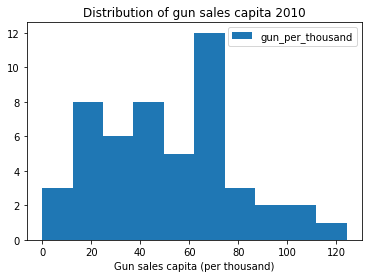

In [40]:
# check type of spread gun sales per thousand and find median
df_cmn_10.gun_per_thousand.plot(kind = 'hist')
print_descr('Distribution of gun sales capita 2010', 
            'Gun sales capita (per thousand)')
print('Median value guns per thousand = ',
      df_cmn_10.total_guns.sum()/df_cmn_10.total_pop_ad.sum()*1000)

**Short conclusions:**
- guns capita looks not like Gaussian distribution skewed to rigth 
- median gun sales approximatelly 40 guns per thousand men

Select neded data for 2016 year and perform analysys with census and gun data fro 2016 in same way

In [41]:
# select yearly statistics for gun sales per state in 2010
df_cmn_16 = select_year_data (gdf_buy, cdf_ppltn, '2016')
df_cmn_16.head(3)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,total_guns,total_pop_ad,gun_per_thousand,prcnt_tot_gun,prcnt_tot_pop_ad
state,,,,,
Alabama,315685,3699821,85.324398,0.019760,0.015112
Alaska,86451,531266,162.726393,0.005411,0.002170
Arizona,319165,4890110,65.267448,0.019978,0.019974


### Show information about gun sales capita in 2016

In [42]:
#define states with highest and lowes gun sales
show_stat(df_cmn_16)

States with lowest gun sales per thousand
state
Hawaii         0.000000
Iowa          17.966588
New Jersey    19.193031
Nebraska      22.715838
New York      24.163863
Name: gun_per_thousand, dtype: float64

States with highest gun sales per thousand
state
Wyoming          129.751205
West Virginia    136.524332
Montana          141.102360
South Dakota     161.287695
Alaska           162.726393
Name: gun_per_thousand, dtype: float64


**Short conclusions:**

- repeating for Hawaii zero value requires more investigation of reason
- guns capita differ from min to max approximatelly 10 times (same ratio)

Median value guns per thousand =  67.14772098997754


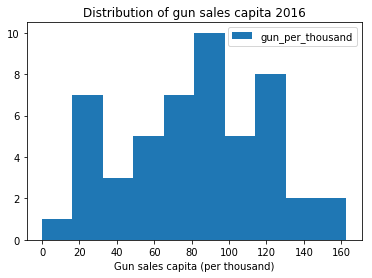

In [43]:
# check type of spread gun sales per thousand
df_cmn_16.gun_per_thousand.plot(kind = 'hist')
print_descr('Distribution of gun sales capita 2016', 
            'Gun sales capita (per thousand)')
print('Median value guns per thousand = ',
      df_cmn_16.total_guns.sum()/df_cmn_16.total_pop_ad.sum()*1000)

**Short conclusions:**
- guns capita looks not like Gaussian distribution skewed to left (shows increasing) 
- median gun sales approximatelly 67 guns per thousand men (shows increasing ~50%) 

### Question 2: is any correlation between population parameters and gun sales?

**If in states with higher people dencity more gun sales?** (year 2010)

Correlation coeff = -0.5547374285672397


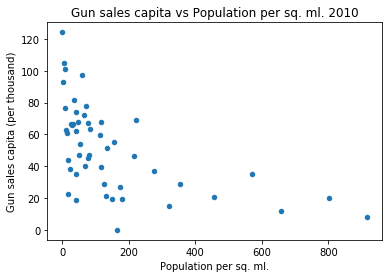

In [44]:
#check correlation between people dencity and % of gun sales in 2010
df_cmn_10.plot(x='total_ppsm', y='gun_per_thousand', kind='scatter')
print_descr('Gun sales capita vs Population per sq. ml. 2010',
            'Population per sq. ml.',
            'Gun sales capita (per thousand)')

print('Correlation coeff =',
df_cmn_10.total_ppsm.corr(df_cmn_10.gun_per_thousand))

**Short conclusions:**
- there is no strong correlation (coeff = -0,55) but more gun sales in states with low people dencity (like villages or small towns)

*Note: unfortunatelly there is no statistics for 2016 to proof conclusion and see trend*

**If in states with higher people % from total population more % of gun sales?** (year 2010)

Correlation coeff = 0.7798836841942666


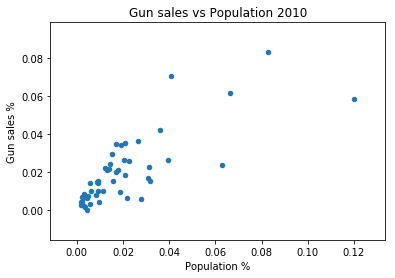

In [45]:
#check correlation between % of people and % of gun sales in 2010
df_cmn_10.plot(x='prcnt_tot_pop_ad', y='prcnt_tot_gun', kind='scatter')
print_descr('Gun sales vs Population 2010',
            'Population %',
            'Gun sales %')

print('Correlation coeff =',
df_cmn_10.prcnt_tot_pop_ad.corr(df_cmn_10.prcnt_tot_gun))

**Short conclusions:**
- there is strong correlation (coeff = 0,78): more gun sales in states with higher amount of people

**If in states with higher people % from total population more % of gun sales?** (year 2016 and trend)

Correlation coeff = 0.8507461121023653


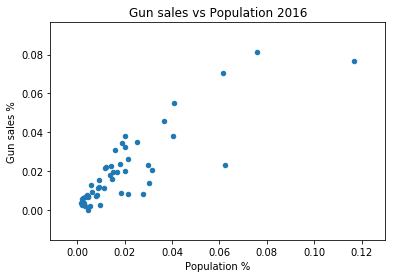

In [46]:
#check correlation between % of people and % of gun sales in 2016
df_cmn_16.plot(x='prcnt_tot_pop_ad', y='prcnt_tot_gun', kind='scatter')
print_descr('Gun sales vs Population 2016',
            'Population %',
            'Gun sales %')

print('Correlation coeff =',
df_cmn_16.prcnt_tot_pop_ad.corr(df_cmn_16.prcnt_tot_gun))

**Short conclusions:**
- more stronger correlation (coeff = 0,85): more gun sales in states with higher amount of people
- no specific states with low amount of people and big gun sales

### Question 3: what is genral trend for gun sales per year?

**What are gun sales and population trend?** 

In [47]:
# select total quantity of gun sales from 2006 till 2016
gdf_buy_yerly = gdf_buy.groupby('year').sum()
idx = gdf_buy_yerly.index
idx = idx[:-12]
gdf_buy_yerly.drop(index=idx, inplace=True)
idx = gdf_buy_yerly.index
idx = idx[-1]
gdf_buy_yerly.drop(index=idx, inplace=True)

gdf_buy_yerly['total'] = gdf_buy_yerly.handgun + gdf_buy_yerly.long_gun + gdf_buy_yerly.multiple
#gdf_buy_yerly.head(3)

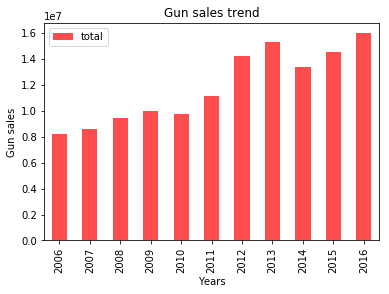

In [48]:
gdf_buy_yerly.plot(y='total', kind='bar', color='r', alpha=.7)
print_descr('Gun sales trend',
            'Years',
            'Gun sales')

In [49]:
# select population from 2006 till 2016
cdf_ppltn.columns
cdf_ppltn_yaerly = cdf_ppltn.sum()['adlt_ppltn_10':'adlt_ppltn_16']
#cdf_ppltn_yaerly

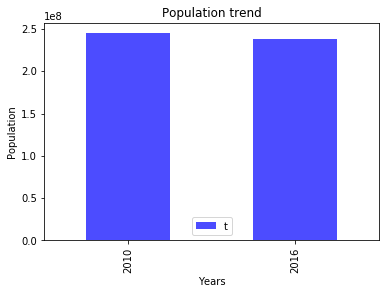

In [51]:
cdf_ppltn_yaerly.plot(kind='bar', color='b', alpha=.7, title ='Population change')
labels = ['2010', '2016']
plt.xticks([0,1], labels)
print_descr('Population trend', 
            'Years',
            'Population',
            'total')

**Short conclusions:**
- it's shown big increase of total gun sales versus stable (very low decrease) of total population

*Note: good to have more years population data*

**Is any correlation between gun sales and population changes on a state levels?**

In [52]:
#create a difference data set
df_10 = df_cmn_10.loc[:,'total_guns' : 'gun_per_thousand']
df_10.columns = df_10.columns+'_10'
df_16 = df_cmn_16.loc[:,'total_guns' : 'gun_per_thousand']
df_16.columns = df_16.columns+'_16'
df = pd.merge(df_10, df_16, on='state' )
#df.head(3)

In [53]:
#dfine chages between 2016 and 2010
df['total_guns_dif'] = (df.total_guns_16 - df.total_guns_10)/(df.total_guns_10+0.001)
df['total_pop_ad_dif'] = (df.total_pop_ad_16 - df.total_pop_ad_10)/(df.total_pop_ad_10+0.001)
df['gun_per_thousand_dif'] = (df.gun_per_thousand_16 - df.gun_per_thousand_10)/(df.gun_per_thousand_10+0.001)
#df.columns

In [54]:
# sort by increasing of population grow %
df.sort_values('total_pop_ad_dif', inplace=True)

In [55]:
#plot hist of population and gun sales chages
ind = np.arange(len(df.total_pop_ad_16))  # the x locations for the groups
# the width of the bars
width = 0.3       
#background color
plt.rcParams['axes.facecolor'] = 'white'

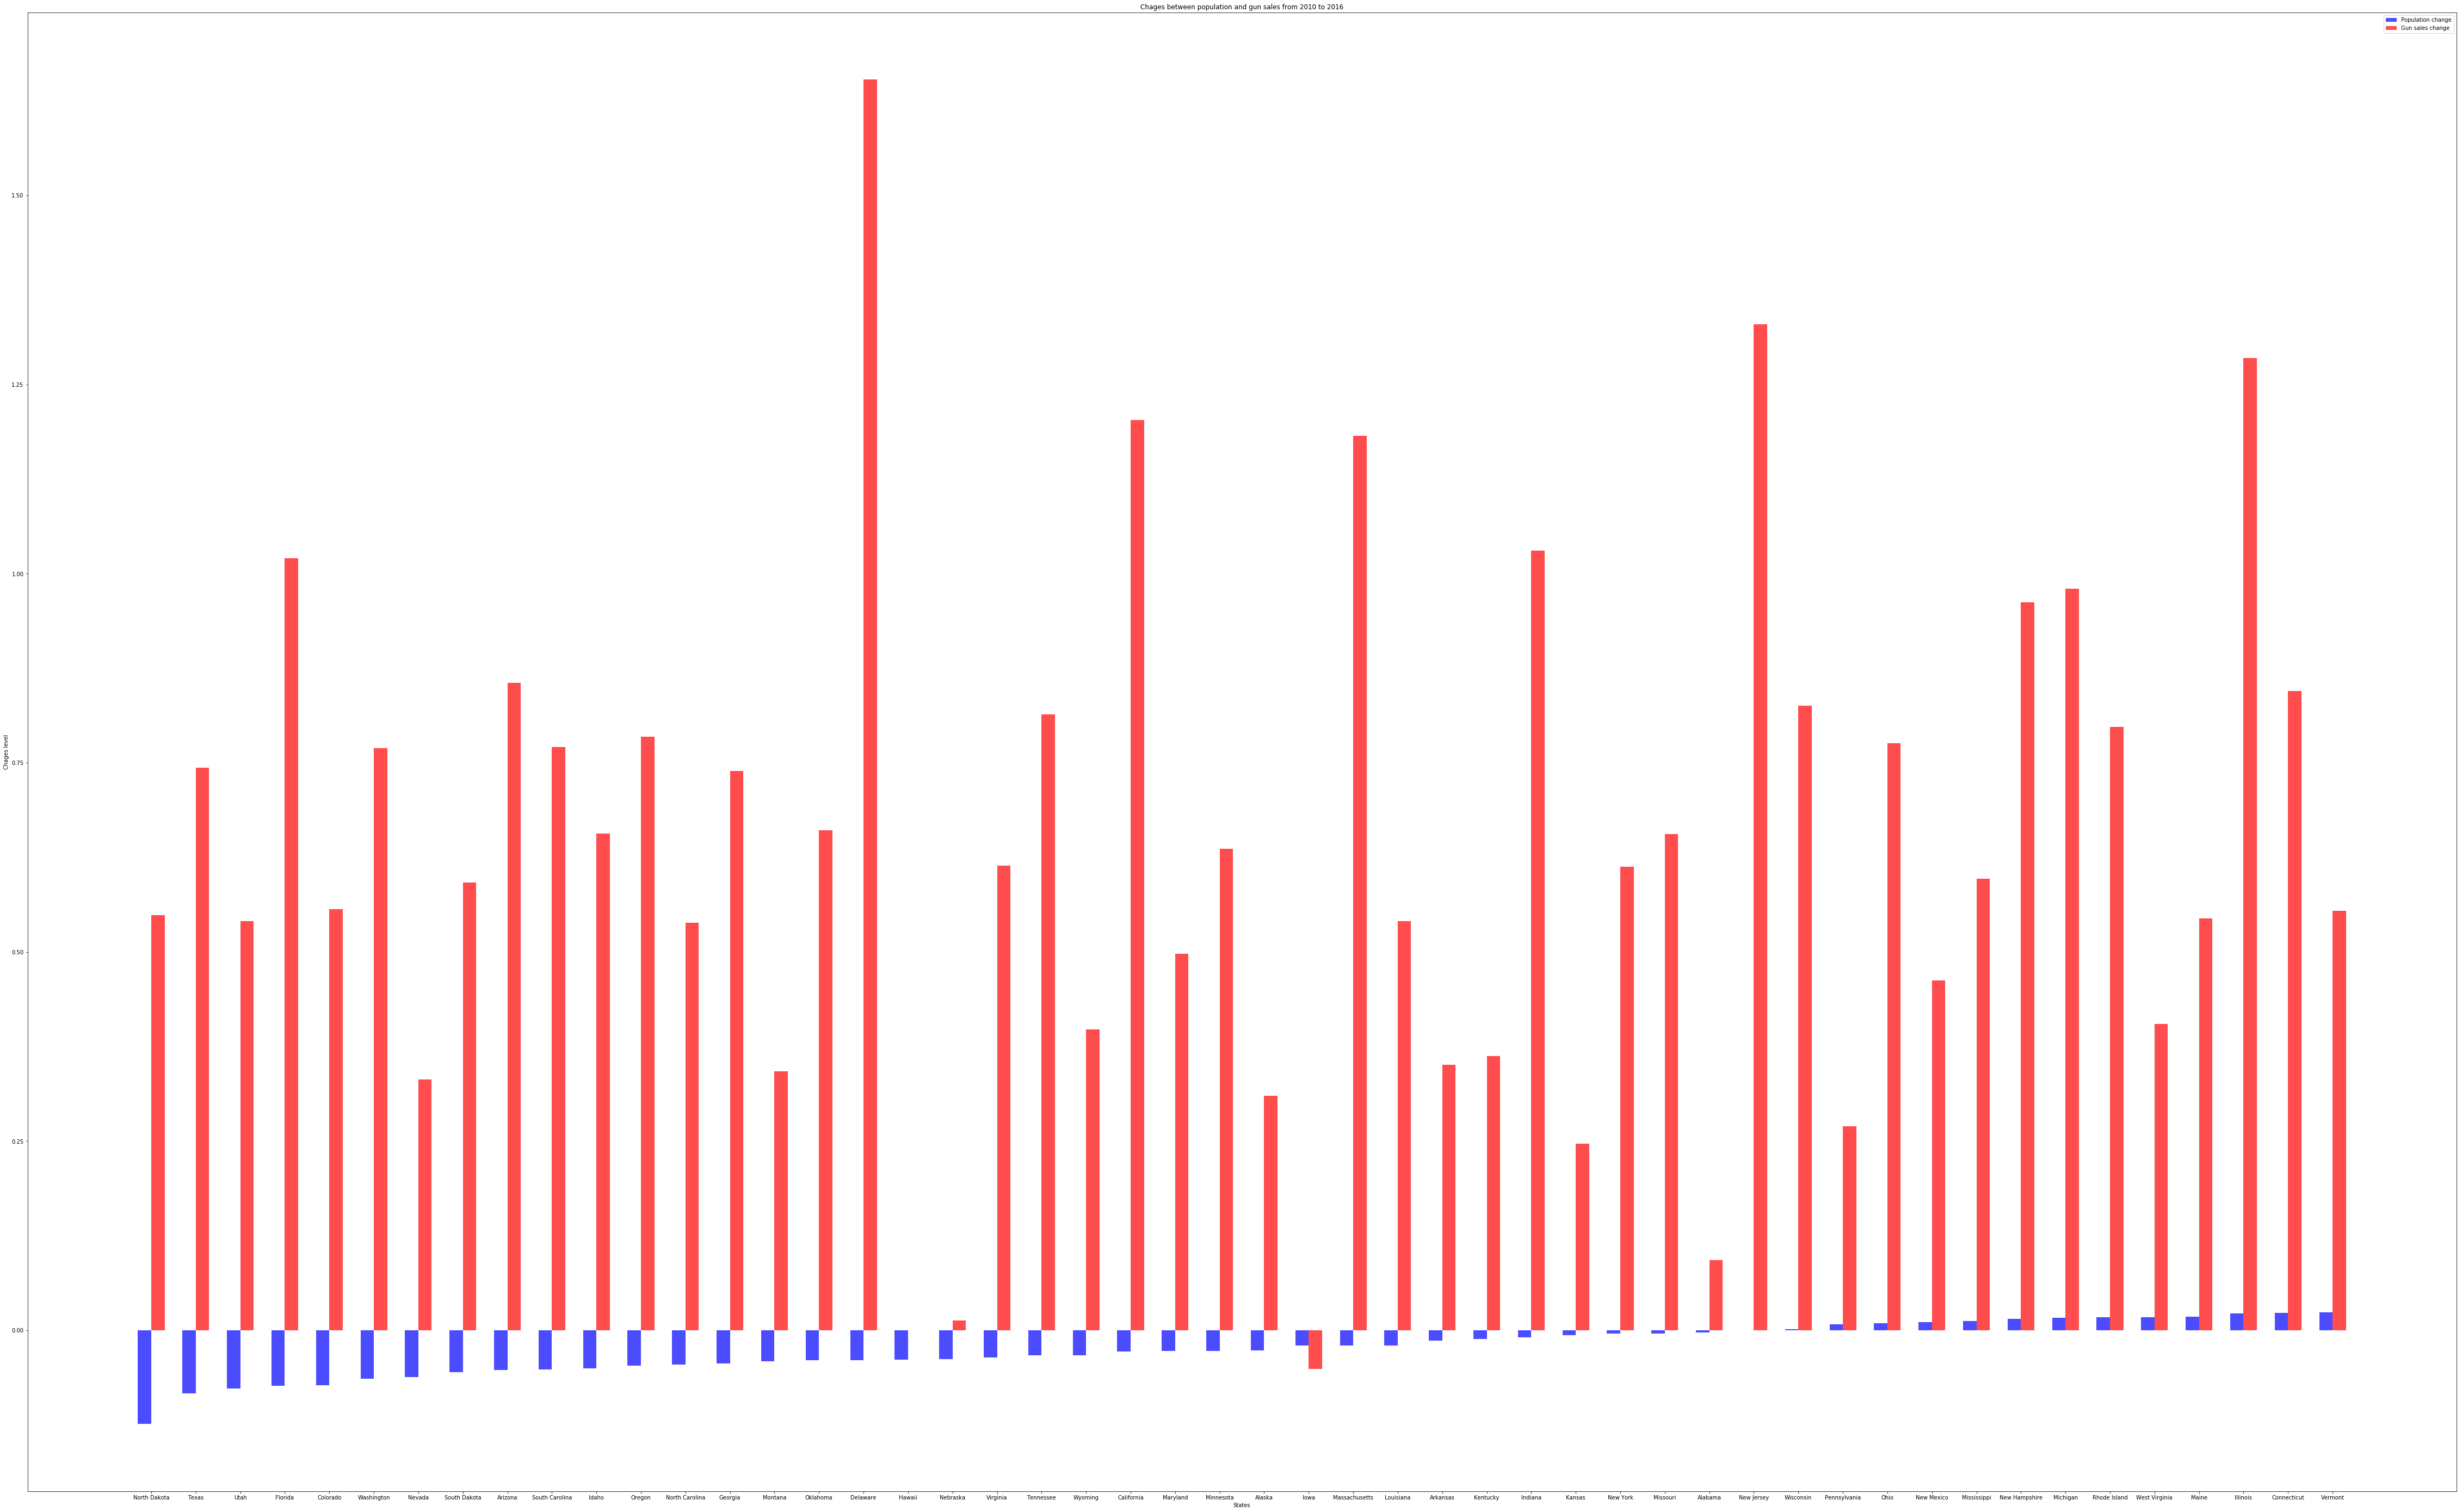

In [56]:
# plot bars for each state changes
plt.clf
fig, ax = plt.subplots(figsize =(80,50))
pop_ad_bars = plt.bar(ind,         df.total_pop_ad_dif,     width, color='b', alpha=.7, label='Population change')
guns_bars   = plt.bar(ind + width, df.gun_per_thousand_dif, width, color='r', alpha=.7, label='Gun sales change')

locations = ind + width / 2  # xtick locations
labels = df.index
plt.xticks(locations, labels)

# title and labels
print_descr('Chages between population and gun sales from 2010 to 2016',
            'States',
            'Chages level')

Correlation coeff = 0.222417395129436


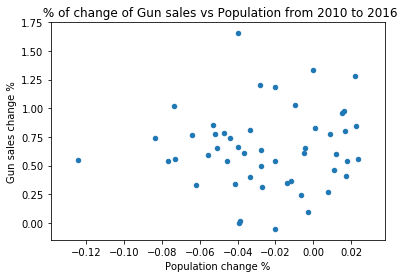

In [57]:
#check correlation between changes in population and  gun sales from 2010 to 2016
df.plot(x='total_pop_ad_dif', y='gun_per_thousand_dif', kind='scatter')
print_descr(' % of change of Gun sales vs Population from 2010 to 2016',
            'Population change %',
            'Gun sales change %')

print('Correlation coeff =',
df.total_pop_ad_dif.corr(df.total_guns_dif))

**Short conclusions:**
- we see very low correlation (coeff = 0.22) between gun sales and population change on a state levels


<a id='conclusions'></a>
## 4. Conclusions

1) Investigation showed gun sales capita form 18 to 167 per thousand people at different states in 2016. 
2) In staes with less people dencity (people per square mile) level of gun sales higher
3) Staes with higher amount of people have higher level of gun sales.
4) Over all gun sales increased year by year with out correlation to poulation chage.

Recomendation for additional investigation:
 - include another years (after 2016) statistics to make investigation more upto date.
 - try to investigate level of gun sales depends on ethnics or race difference % at state
 - clarify reasons of zero gun sales at Hawaii
 - investigate potential impact of 'redemption', 'rentals', 'returned', 'private_sale' checks on existed results.
 - limitation: 5 states statistic was exluded due to missing inforamtion in census data


## 5. Submitting your Project

Html format was created via script. After project was submited for inspection

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0